In [1]:
URL = 'https://data.seattle.gov/api/views/mdbt-9ykn/rows.csv?accessType=DOWNLOAD'

In [2]:
from urllib.request import urlretrieve
urlretrieve(URL,'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x259c6925cc0>)

In [3]:
import pandas as pd 
data = pd.read_csv('Fremont.csv')
data.head()

,Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
0,12/01/2014 12:00:00 AM,23689,24818
1,11/01/2012 12:00:00 AM,26062,24585
2,12/01/2012 12:00:00 AM,18608,17761
3,01/01/2015 12:00:00 AM,35754,24876
4,12/01/2017 12:00:00 AM,18946,26916


In [4]:
import pandas as pd 
data = pd.read_csv('Fremont.csv', index_col= 'Date', parse_dates = True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2014-12-01,23689,24818
2012-11-01,26062,24585
2012-12-01,18608,17761
2015-01-01,35754,24876
2017-12-01,18946,26916


In [5]:
#data.describe()

In [6]:
#data.count()

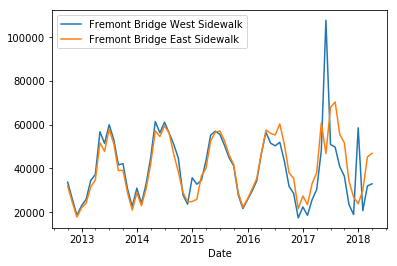

In [7]:
%matplotlib inline
data.resample('M').sum().plot()

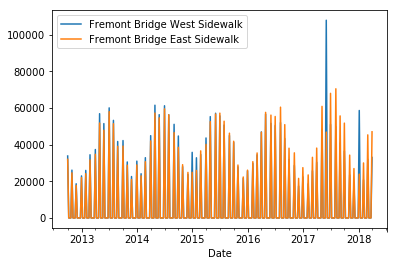

In [8]:
%matplotlib inline
data.resample('W').sum().plot()

In [16]:
data.columns

Index(['West', 'East', 'Total'], dtype='object')

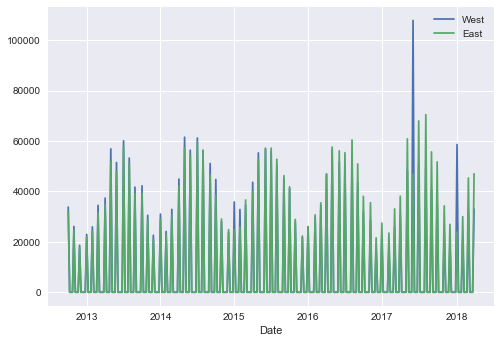

In [10]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
data.columns = ['West' , 'East']
data.resample('W').sum().plot()
#data.plot()

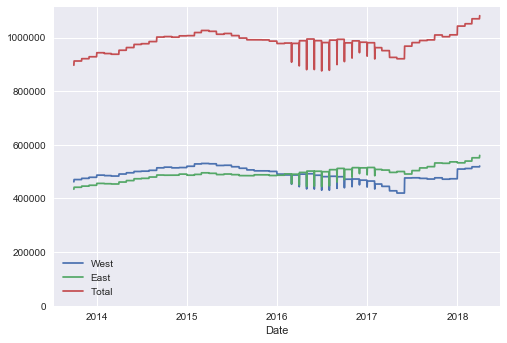

In [11]:
data['Total'] = data['West'] + data['East']

ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

In [12]:
#data.groupby(data.index.time).mean().plot()

In [19]:
pivoted = data.pivot_table('Total',index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-01,2012-11-01,2012-12-01,2013-01-01,2013-02-01
00:00:00,65695,50647,36369,44884,50027


In [14]:
#pivoted.plot(legend = False)